In [176]:
# Final Project
# Furniture Price Prediction
# Prices of Furniture collected from Jumia

# importing modules

# matplotlib.pyplot
# creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
# to visualize bivariate relationships between combinations of variables.
from pandas.plotting import scatter_matrix
# The warnings filter controls whether warnings are ignored, displayed, or turned into errors
from warnings import filterwarnings
filterwarnings('ignore')
import os
# to perform a wide variety of mathematical operations on arrays.
# linear algebra
import numpy as np
from sklearn.preprocessing import LabelEncoder
# making statistical graphics in Python
import seaborn as sns
from matplotlib import pyplot as plt

# working with data sets
import pandas as pd


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [177]:
# load csv file with pandas
data_frame=pd.read_csv('Furniture Price Prediction.csv')
data_frame

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


In [178]:
# Descriptive Analysis
# # Data's number of rows, columns, data types and missing values
def descriptive_analysis(dataframe):
    print("------------------Shape------------------------")
    print(f'{dataframe.shape}\n\n')
    print("------------------Columns------------------------")
    print(f'{dataframe.columns}\n\n')
    print("------------------Information------------------------")
    print(f'{dataframe.info()}\n\n')
    print("------------------Describe------------------------")
    print(f'{dataframe.describe()}\n\n')
    print("------------------Null Values------------------------")
    print(f'{dataframe.isnull().sum()}\n\n')
    print("------------------Unique Values------------------------")
    print(f'{dataframe.nunique()}\n\n')



In [179]:
# call descriptive analysis function
# output
descriptive_analysis(data_frame)

------------------Shape------------------------
(2000, 7)


------------------Columns------------------------
Index(['furniture', 'type', 'url', 'rate', 'delivery', 'sale', 'price'], dtype='object')


------------------Information------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB
None


------------------Describe------------------------
              rate     delivery         price
count  2000.000000  2000.000000   1961.000000
mean      0.743450   142.673285   2910.418195
std       1.611737   139.3391

In [180]:
# find duplicate before data cleaning
duplicate = data_frame[data_frame.duplicated()]
duplicate

,furniture,type,url,rate,delivery,sale,price
40,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
41,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
42,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
43,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
44,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1760,3 Pairs Toilet Seat Hinges Set With Fittings S...,Pairs Toilet Seat Hinges Set With Fittings Scr...,https://www.jumia.com.eg//ar/generic-3-pairs-t...,0.0,399.50,44%,1688.0
1761,Sofa Bed,Rango,https://www.jumia.com.eg//ar/rango-sofa-bed-su...,0.0,172.14,13%,4000.0
1762,One drawer home office,Modern Home,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,0%,2130.0
1789,cm TV table,Modern Home,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,72%,3000.0


In [181]:
# Descriptive Analysis continue
# Categorical data's value count
features_category = ["furniture", "type", "sale"]
for tp in features_category:
    print("Feature name: " + tp)
    print("----------------------------")
    print(data_frame[tp].value_counts())
    print("\n")

Feature name: furniture
----------------------------
Modern capton bed, cm wood                          29
cm TV table                                         27
Corner bed                                          22
Sofa bed                                            21
Mora mattress, ten years guarantee, size is high    19
                                                    ..
Living room                                          1
Home Gallery Wall Shelf x x White                    1
New Primo Sofa Bed                                   1
In Home Bed Sofa - 120 *190 Cm -  Teal               1
Coffee table + side table                            1
Name: furniture, Length: 1224, dtype: int64


Feature name: type
----------------------------
Modern Home                                                           678
Rango                                                                  81
Marfy Touch                                                            57
General                   

In [182]:
# Pre processing the data
# working with the copy
data_frame_copy = data_frame.copy()

In [183]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

In [184]:
# Data Cleaning
# Removing unnescessary column
# Removing null values of dataframe
# Data formatting
def data_cleaning(data_frame_copy):
    data_frame_copy.dropna(subset=["price"], inplace=True)
    data_frame_copy.drop(labels="url", axis=1, inplace=True)
    rate_col = data_frame_copy[data_frame_copy.rate != 0]
    avg_rate = rate_col["rate"].mean()
    data_frame_copy["rate"] = data_frame_copy["rate"].replace([0], avg_rate)
    data_frame_copy["sale"] = data_frame_copy["sale"].str.replace('\D', '', regex=True)
    data_frame_copy["sale"] = data_frame_copy["sale"].astype(int)
    
    # categorcal data
    # Since, there are two features-->["furniture","type"] with large number of categories, 
    # we have to do target encoding. (one-hot or label encoding are not suitable here).
    attribs_cat = ["furniture", "type"]
    encoder=TargetEncoder(cols=attribs_cat)
    df = encoder.fit_transform(data_frame_copy[attribs_cat],data_frame_copy["price"])
    data_frame_copy["furniture"] = df["furniture"]
    data_frame_copy["type"] = df["type"]
    
    return data_frame_copy

In [185]:
# call data cleaning function
data_frame_copy = data_cleaning(data_frame_copy)

In [186]:
# calling data descriptive once again with new data set
descriptive_analysis(data_frame_copy)

------------------Shape------------------------
(1961, 6)


------------------Columns------------------------
Index(['furniture', 'type', 'rate', 'delivery', 'sale', 'price'], dtype='object')


------------------Information------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  1961 non-null   float64
 1   type       1961 non-null   float64
 2   rate       1961 non-null   float64
 3   delivery   1961 non-null   float64
 4   sale       1961 non-null   int64  
 5   price      1961 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 107.2 KB
None


------------------Describe------------------------
         furniture         type         rate     delivery         sale  \
count  1961.000000  1961.000000  1961.000000  1961.000000  1961.000000   
mean   2961.567310  3048.642072     3.972703   141.282963    23.4431

In [192]:
# format currency
from babel.numbers import format_currency
data_frame.dropna(inplace=True)

In [193]:
data_frame["price"] = data_frame["price"].apply(lambda x: format_currency(x, currency="USD", locale="en_US"))
data_frame

# it only apply to original file not copy

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,"$2,500.00"
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,"$1,200.00"
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,"$1,099.00"
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,"$1,200.00"
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,"$1,400.00"
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,"$1,632.00"
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,"$11,450.00"
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,$550.00
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,"$8,495.00"


array([[<Axes: title={'center': 'furniture'}>,
        <Axes: title={'center': 'type'}>],
       [<Axes: title={'center': 'rate'}>,
        <Axes: title={'center': 'delivery'}>],
       [<Axes: title={'center': 'sale'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

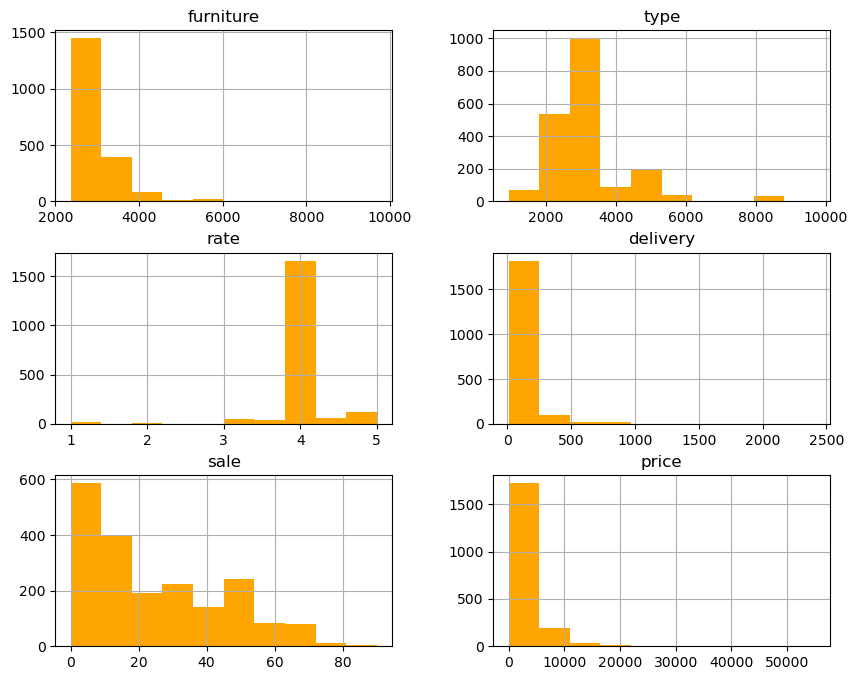

In [190]:
# Data visualizing
data_frame_copy.hist(figsize=(10,8),color='orange')

<Axes: ylabel='price'>

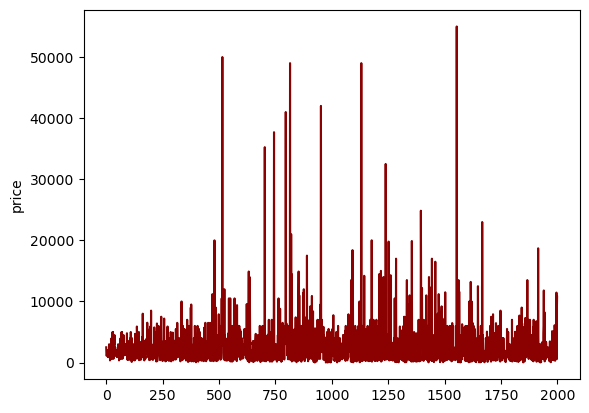

In [121]:
# line diagram y-axis 'price'
sns.lineplot(data_frame_copy["price"],color='darkred')

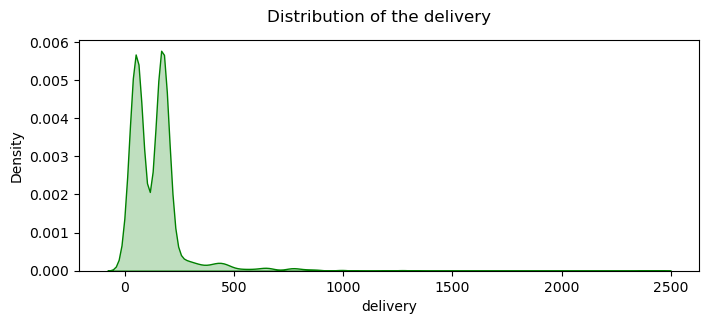

In [122]:
# Distribution of the delivery
plt.figure(figsize=(8, 3))
sns.kdeplot(data_frame_copy['delivery'],color='g', shade=True)
plt.suptitle("Distribution of the delivery")
plt.show()

In [123]:
# Co-relation
corr_matrix=data_frame_copy.corr()
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
furniture    0.881475
type         0.635377
delivery     0.101149
rate        -0.021114
sale        -0.178771
Name: price, dtype: float64

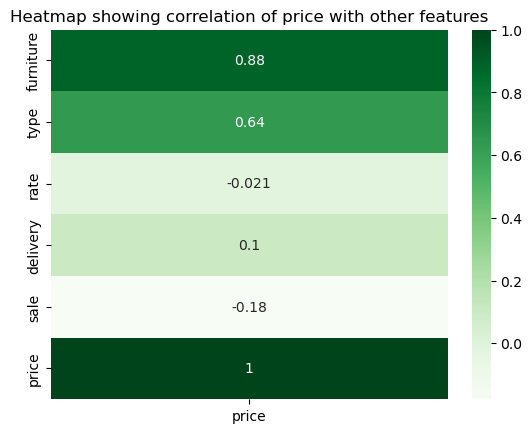

In [124]:
plt.title('Heatmap showing correlation of price with other features')
sns.heatmap(corr_matrix[['price']],annot=True,cmap='Greens')
plt.show()

<Axes: >

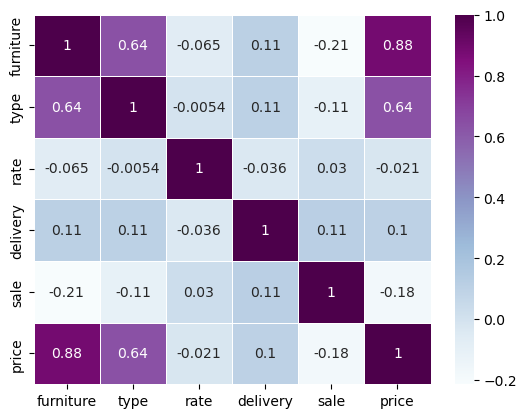

In [125]:
sns.heatmap(corr_matrix,annot=True,linewidth=.5,cmap='BuPu')

array([[<Axes: xlabel='furniture', ylabel='furniture'>,
        <Axes: xlabel='type', ylabel='furniture'>,
        <Axes: xlabel='rate', ylabel='furniture'>,
        <Axes: xlabel='delivery', ylabel='furniture'>,
        <Axes: xlabel='sale', ylabel='furniture'>,
        <Axes: xlabel='price', ylabel='furniture'>],
       [<Axes: xlabel='furniture', ylabel='type'>,
        <Axes: xlabel='type', ylabel='type'>,
        <Axes: xlabel='rate', ylabel='type'>,
        <Axes: xlabel='delivery', ylabel='type'>,
        <Axes: xlabel='sale', ylabel='type'>,
        <Axes: xlabel='price', ylabel='type'>],
       [<Axes: xlabel='furniture', ylabel='rate'>,
        <Axes: xlabel='type', ylabel='rate'>,
        <Axes: xlabel='rate', ylabel='rate'>,
        <Axes: xlabel='delivery', ylabel='rate'>,
        <Axes: xlabel='sale', ylabel='rate'>,
        <Axes: xlabel='price', ylabel='rate'>],
       [<Axes: xlabel='furniture', ylabel='delivery'>,
        <Axes: xlabel='type', ylabel='delivery'>,
    

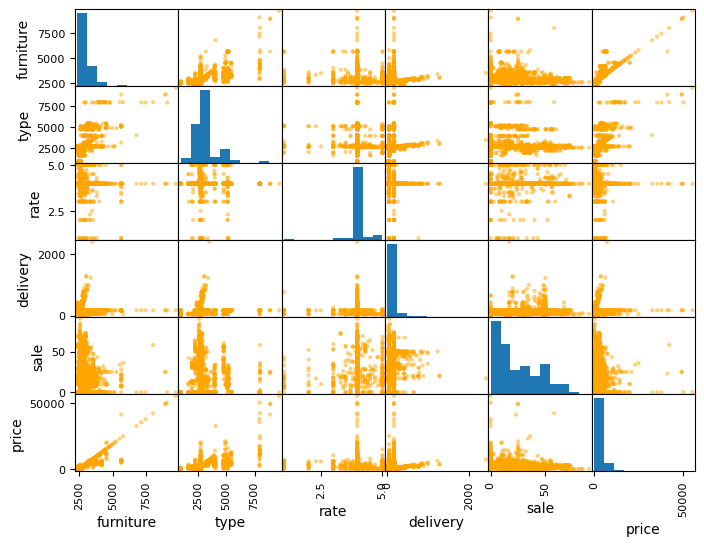

In [126]:
attributes=data_frame_copy.columns
scatter_matrix(data_frame_copy,figsize=(8,6),color='orange')

<Axes: ylabel='price'>

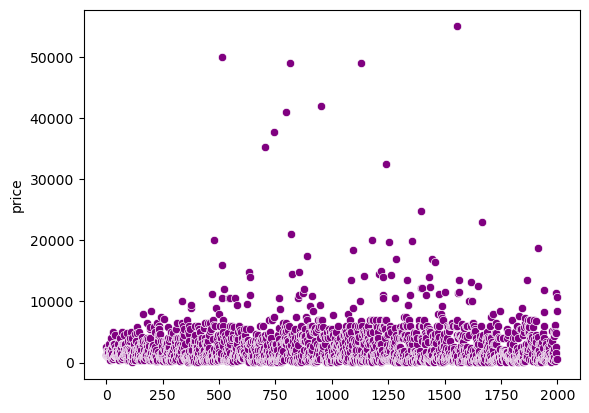

In [127]:
sns.scatterplot(data_frame_copy['price'],color='purple')

In [128]:
furniture_type = data_frame_copy['type'].value_counts()
print(furniture_type)
print(len(furniture_type))

2699.205224    670
5105.558073     81
4747.561788     57
2207.171112     51
3943.236642     44
              ... 
2736.799079      1
2596.674855      1
2576.765656      1
2698.869857      1
2744.085154      1
Name: type, Length: 443, dtype: int64
443


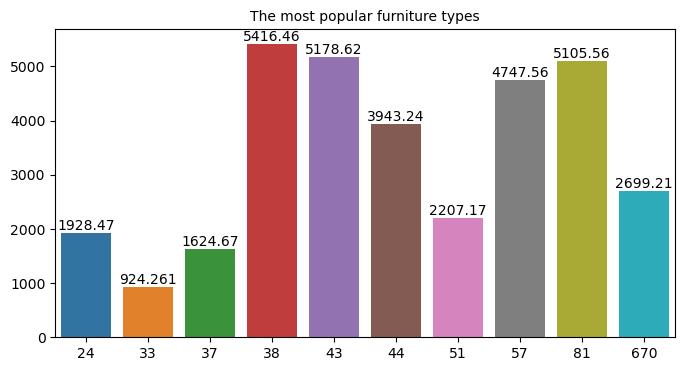

In [129]:
plt.figure(figsize=(8,4))
ax = sns.barplot(y = furniture_type.index[:10], x = furniture_type.values[:10])
for i in ax.containers:
    ax.bar_label(i,)
plt.title("The most popular furniture types", size=10)
plt.show()

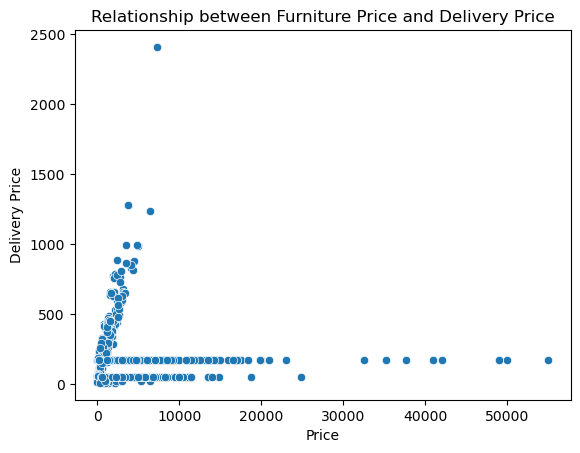

In [130]:
sns.scatterplot(x='price', y='delivery', data=data_frame_copy)
plt.xlabel('Price')
plt.ylabel('Delivery Price')
plt.title('Relationship between Furniture Price and Delivery Price')
plt.show()

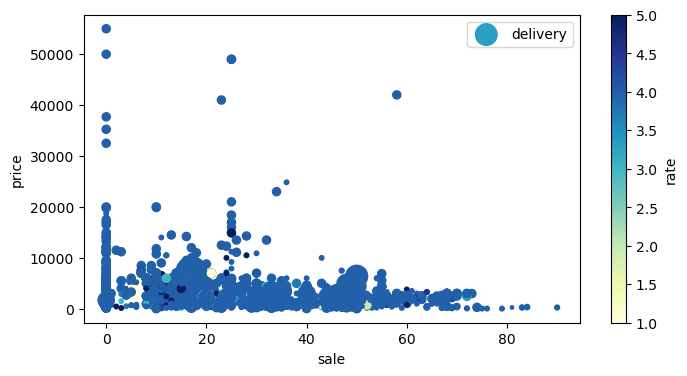

In [131]:
data_frame_copy.plot(kind="scatter", x="sale", y="price", alpha=1,
                 s=data_frame_copy["delivery"]/5, label="delivery", figsize=(8,4),
                 c="rate", cmap="YlGnBu", colorbar=True)
plt.legend()
plt.show()

In [132]:
# Scaling the data
# Predict the price
f = data_frame_copy.drop(labels="price", axis=1)
f

,furniture,type,rate,delivery,sale
0,2574.128948,2847.022840,3.300000,172.14,72
1,2574.128948,2699.205224,3.972703,172.14,54
2,2386.826865,2699.205224,3.972703,172.14,18
3,2377.337947,2699.205224,3.972703,172.14,58
4,2656.695707,2699.205224,5.000000,52.44,54
...,...,...,...,...,...
1995,2744.085154,2744.085154,3.972703,656.28,0
1996,4021.490155,7944.135893,3.972703,172.14,0
1997,2575.590360,1624.668981,3.972703,52.44,0
1998,4511.148141,4928.389499,3.972703,172.14,9


In [133]:
scalar = MinMaxScaler()
f = scalar.fit_transform(f)

In [134]:
f[1]

array([0.02917426, 0.20253939, 0.74317568, 0.06723855, 0.6       ])

In [135]:
# Spliting the data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f, data_frame_copy["price"], test_size=0.2, random_state=42)

In [136]:
# Select and train a model
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [138]:
lin_reg = LinearRegression()

In [139]:
lin_reg.fit(X_train, y_train)
furniture_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, furniture_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1843.785345116205

In [140]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [2386.26819314 1520.63395956 1477.86749104 2200.26295646 2364.71604505
 1644.99570867 1776.98127139 1747.26610643 1264.98129115 2252.24754094]
Mean:  1863.6220563833926
Standard deviation:  385.00286106378724


In [141]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_mse = mean_squared_error(y_test, furniture_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1843.785345116205

In [142]:
tree_scores = cross_val_score(tree, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-lin_scores)
display_scores(tree_rmse_scores)

Scores:  [2386.26819314 1520.63395956 1477.86749104 2200.26295646 2364.71604505
 1644.99570867 1776.98127139 1747.26610643 1264.98129115 2252.24754094]
Mean:  1863.6220563833926
Standard deviation:  385.00286106378724


In [143]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [144]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [ 810.79991471  598.28376793  558.65266977  514.97275312 1444.22488171
  847.9525969   924.90348387  558.57719603  405.56426165 2694.8422059 ]
Mean:  935.8773731602369
Standard deviation:  650.6063382417304


In [145]:
forest_pred = forest_reg.predict(X_test)
tree_pred = tree.predict(X_test)
lin_pred = lin_reg.predict(X_test)

In [146]:
print("r2 score for forest: ", + r2_score(forest_pred, y_test))
print("r2 score for tree: ", + r2_score(tree_pred, y_test))
print("r2 score for linear: ", + r2_score(lin_pred, y_test))

r2 score for forest:  0.8852698810030737
r2 score for tree:  0.868850465870119
r2 score for linear:  0.7493785687247865


In [147]:
# Fine tune model
# Grid Search
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 5]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 5]},
]

In [149]:
forest_reg = RandomForestRegressor()

In [150]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [151]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 5],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 5],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [152]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 3}

In [153]:
cvres = grid_search.cv_results_

In [154]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1159.9676009678496 {'max_features': 2, 'n_estimators': 3}
1220.9251473440756 {'max_features': 2, 'n_estimators': 10}
1135.9317053301525 {'max_features': 2, 'n_estimators': 30}
1335.6708507938 {'max_features': 4, 'n_estimators': 3}
1155.8621402187366 {'max_features': 4, 'n_estimators': 10}
1108.0430349017263 {'max_features': 4, 'n_estimators': 30}
1183.9885622223626 {'max_features': 5, 'n_estimators': 3}
1153.6049704405677 {'max_features': 5, 'n_estimators': 10}
1154.0427697298805 {'max_features': 5, 'n_estimators': 30}
1018.9532322142535 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1083.714231096695 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1116.369167658683 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1134.0703602305148 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
1224.700567910603 {'bootstrap': False, 'max_features': 5, 'n_estimators': 3}
1201.8611475202538 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}


In [155]:
# Testing model
forest_reg = RandomForestRegressor(max_features=5, n_estimators=3)

In [156]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=3)

In [157]:
forest_pred = forest_reg.predict(X_test)
print("r2 score for forest: ", + r2_score(forest_pred, y_test))

r2 score for forest:  0.9033031223793728


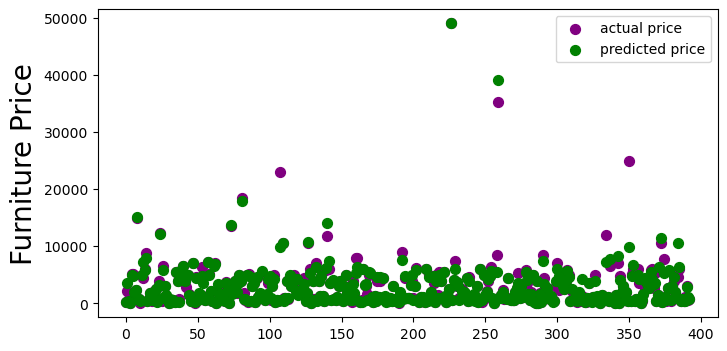

In [160]:
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, color='purple', label="actual price", s=50) 
plt.scatter(range(len(y_test)), forest_pred, color='green', label="predicted price", s=50)
plt.ylabel("Furniture Price", fontsize=20)
plt.legend()
plt.show()